In [238]:
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data using pandas

In [239]:
data= pd.read_csv(r'HR-DT-PACKT.csv')
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1,0.0,sales,low
1,0.80,0.86,5,262.0,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272.0,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223.0,5,0,1,0.0,sales,low
4,0.37,0.52,2,159.0,3,0,1,0.0,sales,low


In [240]:
len(data)

14999

In [241]:
data.shape

(14999, 10)

## Scrubbing the data

In [242]:
data.isnull().values.any()

True

In [243]:
#It seems we have some missing values now let us explore what are the columns
#having missing values

data.isnull().any()

## it seems that we have missing values in average_montly_hours and promotion_last_5_years

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours      True
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years     True
sales                    False
salary                   False
dtype: bool

In [244]:
data[["average_montly_hours","promotion_last_5years"]].describe()

### From the below description it is observed that promotion_last_5years has value of only 0 and 1
### where as average_montly_hours has value inbetween 96 to 310

,average_montly_hours,promotion_last_5years
count,14986.000000,14976.000000
mean,201.059656,0.021301
std,49.930897,0.144390
min,96.000000,0.000000
25%,156.000000,0.000000
50%,200.000000,0.000000
75%,245.000000,0.000000
max,310.000000,1.000000


In [245]:
## No of missing Values present
data.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours     13
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years    23
sales                     0
salary                    0
dtype: int64

In [246]:
## Percentage of missing Values present

round(data.isnull().sum()/len(data)*100,2)

satisfaction_level       0.00
last_evaluation          0.00
number_project           0.00
average_montly_hours     0.09
time_spend_company       0.00
Work_accident            0.00
left                     0.00
promotion_last_5years    0.15
sales                    0.00
salary                   0.00
dtype: float64

In [247]:
## Checking the datatype of the missing columns
data[["average_montly_hours","promotion_last_5years"]].dtypes

average_montly_hours     float64
promotion_last_5years    float64
dtype: object

### There are three ways to impute missing values:
    1. Droping the missing values rows
    2. Fill missing values with a test stastics
    3. Predict the missing values using ML algorithm

In [248]:
### Filling the missing value with the mean of the values
mean_value=data['average_montly_hours'].mean()
data['average_montly_hours']=data['average_montly_hours'].fillna(mean_value)

In [249]:
data['promotion_last_5years'].value_counts()

0.0    14657
1.0      319
Name: promotion_last_5years, dtype: int64

In [250]:
### Since it seems that the promotion_last_5years is a categorical field therefore
### we will fill the values with the 0 since its the most occuring number

data['promotion_last_5years']=data['promotion_last_5years'].fillna(value=0)

In [251]:
##checking for any missing values

data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

### Renaming the columns

In [252]:
# We would want to rename some of the columns

data = data.rename(columns={
                        'promotion_last_5years': 'promotion',
                        'left' : 'churn',
                        'sales': 'department'
                        })
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

### We would also like to move the churn columnn to the extreme right

In [253]:
column_churn = data['churn']
data.drop(labels=['churn'], axis=1,inplace = True)
data.insert(len(data.columns), 'churn', column_churn.values)

In [254]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion', 'department', 'salary', 'churn'],
      dtype='object')

### Changing the data type

In [255]:
# Convert these variables into categorical variables
data["department"] = data["department"].astype('category')
data["salary"] = data["salary"].astype('category')

In [256]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company         int64
Work_accident              int64
promotion                float64
department              category
salary                  category
churn                      int64
dtype: object

# Exploring the data

## Statistical Overview

In [180]:
data['churn'].value_counts(0)

0    11428
1     3571
Name: churn, dtype: int64

In [181]:
data['churn'].value_counts(1)*100

0    76.191746
1    23.808254
Name: churn, dtype: float64

In [128]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,churn
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.059656,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.909253,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [182]:
summary_churn = data.groupby('churn')
summary_churn.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion
churn,,,,,,,
0,0.666810,0.715473,3.786664,199.054356,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.477064,3.876505,0.047326,0.005321


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary,churn
satisfaction_level,1.000000,0.105021,-0.142970,-0.020375,-0.100866,0.058697,0.025605,0.003153,0.011754,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339425,0.131591,-0.007104,-0.008684,0.007772,0.013965,0.006567
number_project,-0.142970,0.349333,1.000000,0.416449,0.196786,-0.004741,-0.006064,0.009268,0.009672,0.023787
average_montly_hours,-0.020375,0.339425,0.416449,1.000000,0.127069,-0.010507,-0.004055,0.003715,0.007062,0.071879
time_spend_company,-0.100866,0.131591,0.196786,0.127069,1.000000,0.002120,0.067433,-0.018010,-0.003086,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010507,0.002120,1.000000,0.039245,0.003425,-0.002506,-0.154622
promotion,0.025605,-0.008684,-0.006064,-0.004055,0.067433,0.039245,1.000000,-0.027336,-0.001318,-0.061788
department,0.003153,0.007772,0.009268,0.003715,-0.018010,0.003425,-0.027336,1.000000,0.000685,0.032105
salary,0.011754,0.013965,0.009672,0.007062,-0.003086,-0.002506,-0.001318,0.000685,1.000000,-0.001294
churn,-0.388375,0.006567,0.023787,0.071879,0.144822,-0.154622,-0.061788,0.032105,-0.001294,1.000000


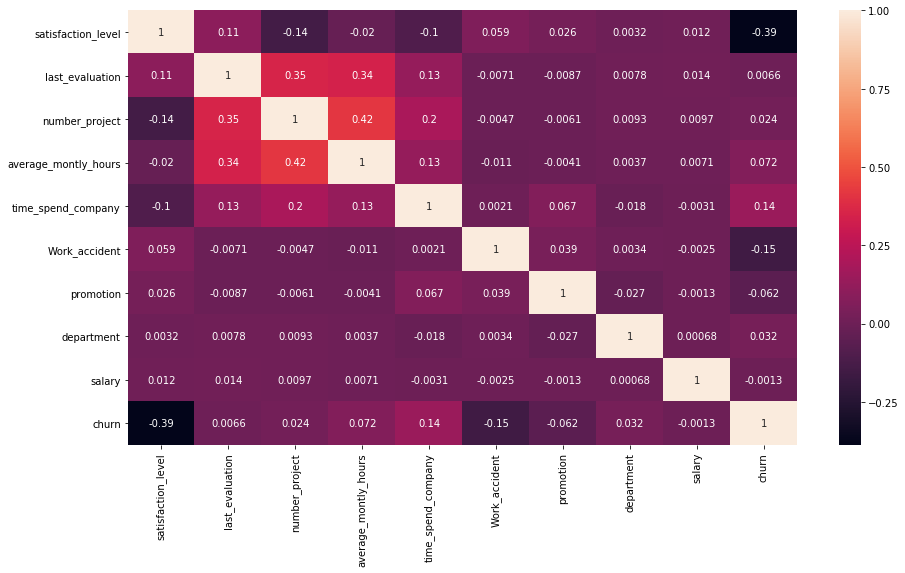

In [218]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
corr

## Visualization

C:\Users\beher\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\beher\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\beher\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'No of Employee')

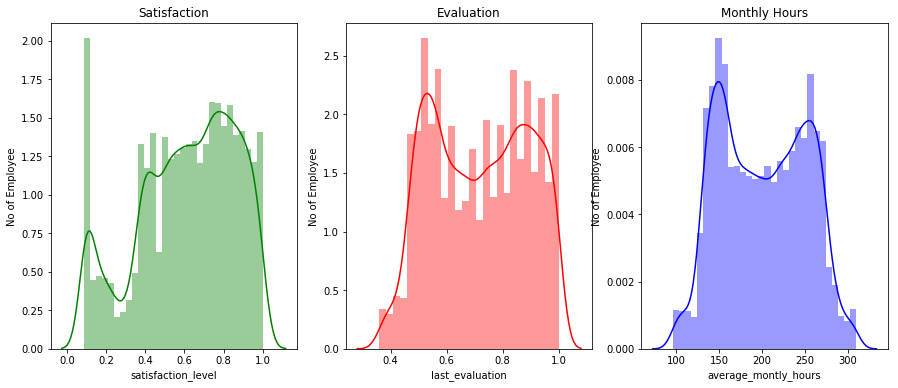

In [184]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(data.satisfaction_level, kde=True, color="g", ax=axes[0]).set_title('Satisfaction')
axes[0].set_ylabel('No of Employee')


sns.distplot(data.last_evaluation, kde=True, color="r", ax=axes[1]).set_title('Evaluation')
axes[1].set_ylabel('No of Employee')


sns.distplot(data.average_montly_hours, kde=True, color="b", ax=axes[2]).set_title('Monthly Hours')
axes[2].set_ylabel('No of Employee')


Text(0.5,1,'Employee Salary Churn Distribution')

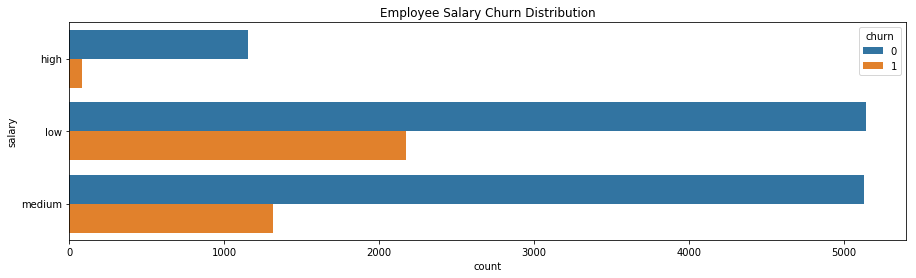

In [185]:
plt.figure(figsize=(15,4))
sns.countplot(y="salary", hue='churn', data=data).set_title('Employee Salary Churn Distribution')

Text(0.5,1,'Employee Department Distribution')

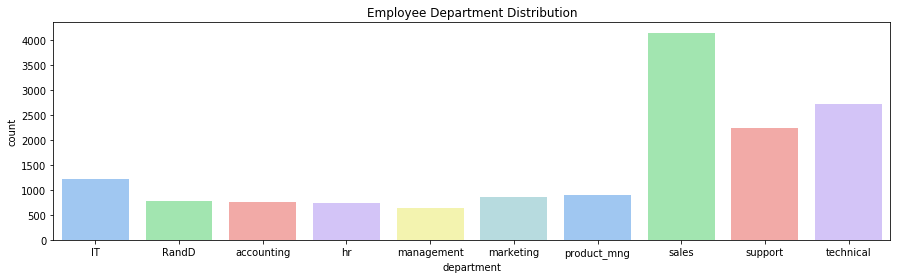

In [186]:
plt.figure(figsize=(15,4))
sns.countplot(x='department', data=data, palette="pastel").set_title('Employee Department Distribution')
 

Text(0.5,1,'Employee Department Churn Distribution')

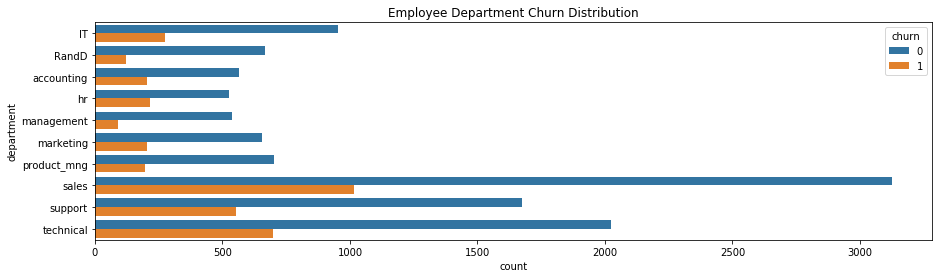

In [187]:
plt.figure(figsize=(15,4))
sns.countplot(y="department", hue='churn', data=data).set_title('Employee Department Churn Distribution')

Text(0.5,1,'Employee Evaluation Distribution - churn vs no churn')

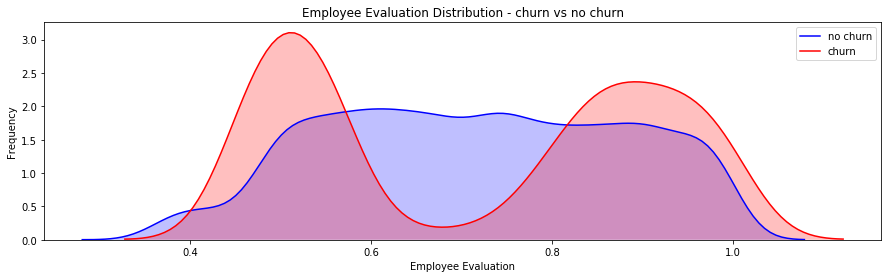

In [188]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['churn'] == 0),'last_evaluation'] , color='b',shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['churn'] == 1),'last_evaluation'] , color='r',shade=True, label='churn')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - churn vs no churn')

## Feature selection

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [192]:
### Encoding the categorical variables
data["department"] = data["department"].astype('category').cat.codes
data["salary"] = data["salary"].astype('category').cat.codes

In [196]:
target = 'churn'
X = data.drop('churn', axis=1)
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

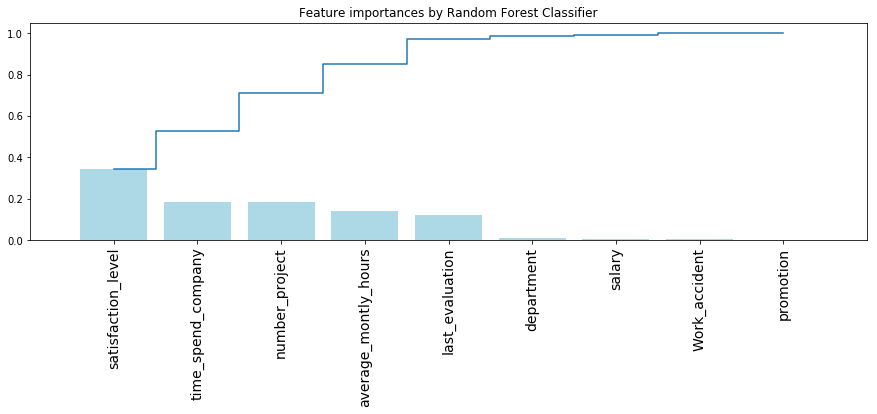

In [198]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train,y_train)

importances=forest.feature_importances_
feat_names = data.drop(['churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances by Random Forest Classifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()